<a href="https://colab.research.google.com/github/Jain-Pranjal/BD-assignment/blob/master/BD_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# loading the file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/Jain-Pranjal/BD-assignment/refs/heads/master/bdAssignment.csv")
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141350 entries, 0 to 141349
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   internal_product_code  141350 non-null  object
 1   internal_geo_code      141350 non-null  object
 2   period_start           141350 non-null  object
 3   value                  141350 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 4.3+ MB
None


,internal_product_code,internal_geo_code,period_start,value
0,FGIQopr4,2OsrePjO,2021-01-01 00:00:00.000000,60800
1,FGIQopr4,2OsrePjO,2021-02-01 00:00:00.000000,65750
2,FGIQopr4,2OsrePjO,2021-03-01 00:00:00.000000,88350
3,FGIQopr4,2OsrePjO,2021-04-01 00:00:00.000000,78750
4,FGIQopr4,2OsrePjO,2021-05-01 00:00:00.000000,83550


In [14]:
# checking for the null values
print(df.isnull().sum())


internal_product_code    0
internal_geo_code        0
period_start             0
value                    0
dtype: int64


In [15]:

# Converting 'period_start' to datetime
df['period_start'] = pd.to_datetime(df['period_start'])
df.head()

,internal_product_code,internal_geo_code,period_start,value
0,FGIQopr4,2OsrePjO,2021-01-01,60800
1,FGIQopr4,2OsrePjO,2021-02-01,65750
2,FGIQopr4,2OsrePjO,2021-03-01,88350
3,FGIQopr4,2OsrePjO,2021-04-01,78750
4,FGIQopr4,2OsrePjO,2021-05-01,83550


In [16]:

# Set it as index
df.set_index('period_start', inplace=True)

# Sort the dataframe by date
df = df.sort_index()

# Display dataset info
print(df.info())

# Show first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 141350 entries, 2021-01-01 to 2025-02-01
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   internal_product_code  141350 non-null  object
 1   internal_geo_code      141350 non-null  object
 2   value                  141350 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.3+ MB
None


,internal_product_code,internal_geo_code,value
period_start,,,
2021-01-01,FGIQopr4,2OsrePjO,60800
2021-01-01,yQOG6Bqj,2OsrePjO,10
2021-01-01,7iYwuOhT,2OsrePjO,60
2021-01-01,U6e8cojY,2OsrePjO,0
2021-01-01,QWdsrbxI,2OsrePjO,500


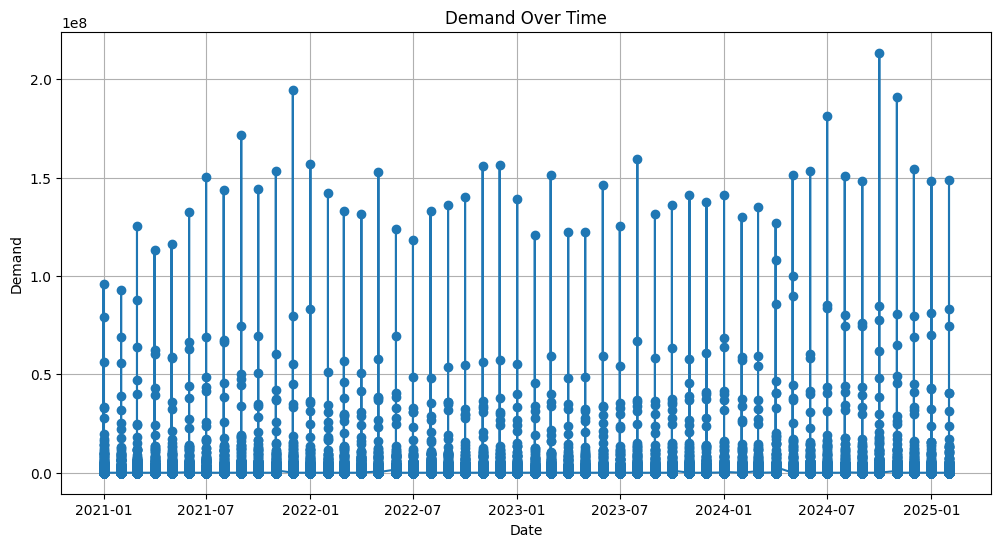

In [17]:
# making the graph to perform EDA
plt.figure(figsize=(12, 6))
plt.plot(df['value'], marker='o', linestyle='-')
plt.title("Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.grid()
plt.show()

# X axis will contains the index (dateTime value)

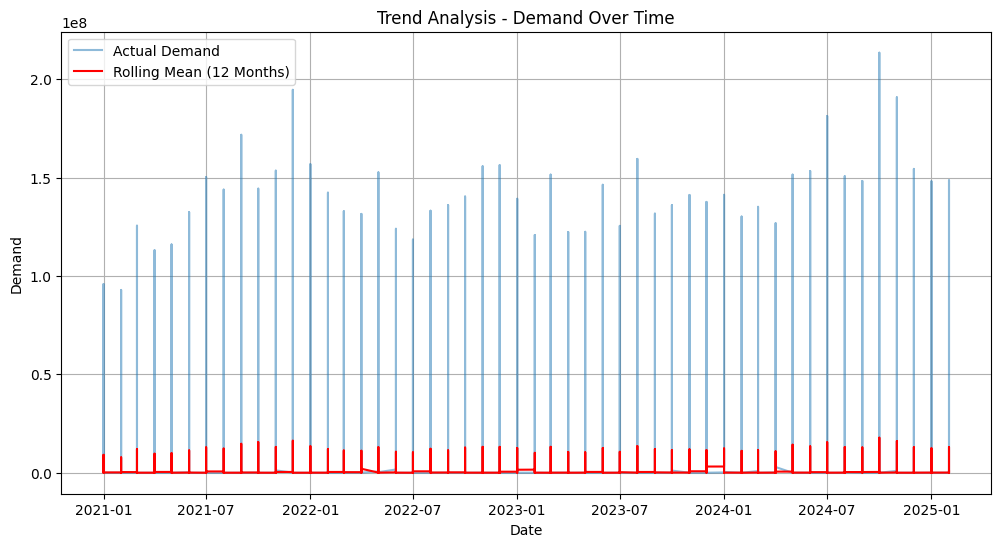

In [18]:
df['rolling_mean'] = df['value'].rolling(window=12).mean()
# accounting the window for 12 months
plt.figure(figsize=(12, 6))
plt.plot(df['value'], label='Actual Demand', alpha=0.5)
plt.plot(df['rolling_mean'], label='Rolling Mean (12 Months)', color='red')
plt.title("Trend Analysis - Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.legend()
plt.grid()
plt.show()


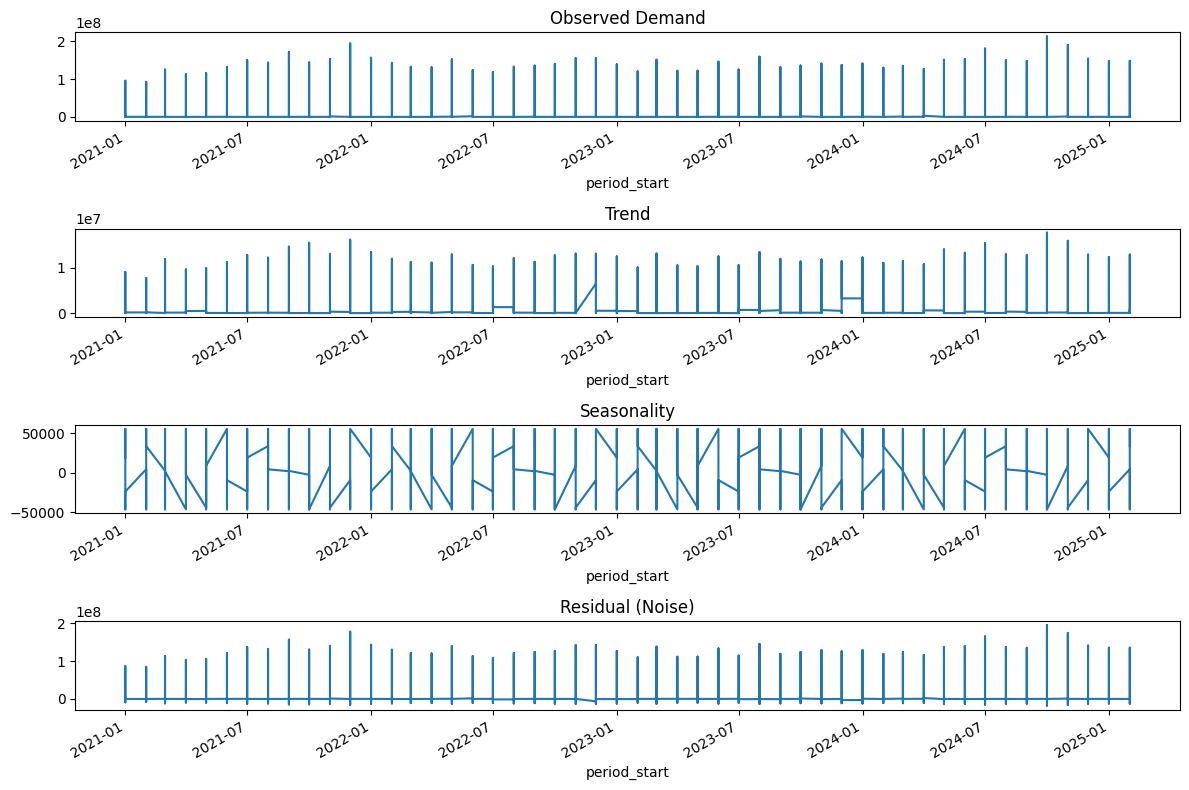

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['value'], model='additive', period=12)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=axes[0], title="Observed Demand")
decomposition.trend.plot(ax=axes[1], title="Trend")
decomposition.seasonal.plot(ax=axes[2], title="Seasonality")
decomposition.resid.plot(ax=axes[3], title="Residual (Noise)")

plt.tight_layout()
plt.show()


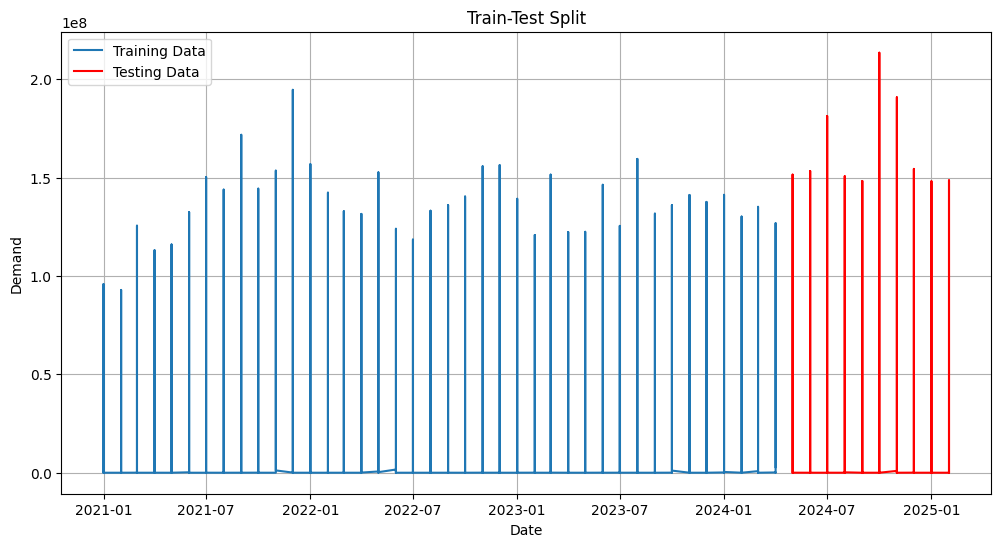

In [20]:
# Making the test and train data
# Determine 80% of the data for training
split_ratio = 0.8
split_index = int(len(df) * split_ratio)  # Find index for 80% split

# Split data into training (80%) and testing (20%)
train = df.iloc[:split_index]
test = df.iloc[split_index:]


# Plot the split
plt.figure(figsize=(12, 6))
plt.plot(train['value'], label='Training Data')
plt.plot(test['value'], label='Testing Data', color='red')
plt.title("Train-Test Split")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

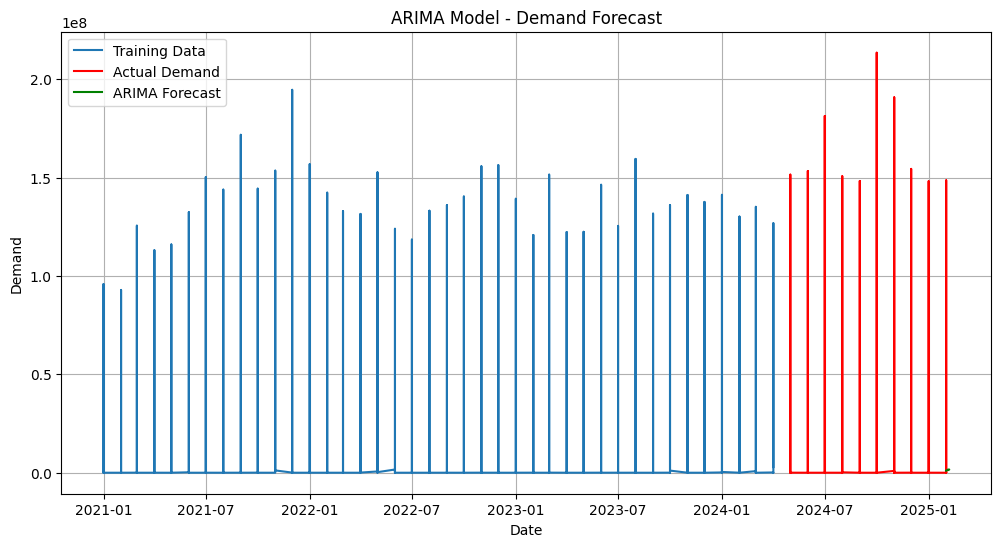

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model
model = ARIMA(train['value'], order=(5,1,0))
arima_model = model.fit()

# Forecast next 6 months
forecast = arima_model.forecast(steps=6)

# Generate a date range for the forecast

forecast_index = pd.date_range(start=test.index[-1], periods=6, freq=test.index.freq)


# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(train['value'], label='Training Data')
plt.plot(test['value'], label='Actual Demand', color='red')
plt.plot(forecast_index, forecast, label='ARIMA Forecast', color='green')
plt.title("ARIMA Model - Demand Forecast")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate error metrics
forecast_values = forecast.values  # Get the values from the forecast Series

test_values_subset = test['value'][:len(forecast_values)]

mae = mean_absolute_error(test_values_subset, forecast_values)
rmse = np.sqrt(mean_squared_error(test_values_subset, forecast_values))

# Calculate MAPE with aligned values
non_zero_mask = test_values_subset != 0
mape = np.mean(np.abs((test_values_subset[non_zero_mask] - forecast_values[non_zero_mask]) / test_values_subset[non_zero_mask])) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 1169531.30
RMSE: 1212686.33
MAPE: 40717.90%


As values are too high so we are rejecting the ARIMA (univariate)

**LSTM Model**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the 'value' column
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['value']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Using past 12 months to predict next month
X, y = create_sequences(scaled_data, seq_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
3534/3534 ━━━━━━━━━━━━━━━━━━━━ 70s 18ms/step - loss: 1.1526e-04 - val_loss: 2.1580e-06
Epoch 2/50
3534/3534 ━━━━━━━━━━━━━━━━━━━━ 80s 18ms/step - loss: 7.8328e-05 - val_loss: 3.9828e-07
Epoch 3/50
3534/3534 ━━━━━━━━━━━━━━━━━━━━ 78s 17ms/step - loss: 4.3258e-05 - val_loss: 4.9949e-06
Epoch 4/50
3534/3534 ━━━━━━━━━━━━━━━━━━━━ 59s 17ms/step - loss: 6.9921e-05 - val_loss: 3.6608e-07
Epoch 5/50
3534/3534 ━━━━━━━━━━━━━━━━━━━━ 64s 18ms/step - loss: 4.2060e-05 - val_loss: 1.8519e-06
Epoch 6/50
3534/3534 ━━━━━━━━━━━━━━━━━━━━ 78s 17ms/step - loss: 3.7053e-05 - val_loss: 9.1291e-08
Epoch 7/50
3534/3534 ━━━━━━━━━━━━━━━━━━━━ 78s 16ms/step - loss: 3.5042e-05 - val_loss: 4.9659e-06
Epoch 8/50
3534/3534 ━━━━━━━━━━━━━━━━━━━━ 82s 16ms/step - loss: 3.2195e-05 - val_loss: 2.0768e-07
Epoch 9/50
3534/3534 ━━━━━━━━━━━━━━━━━━━━ 81s 16ms/step - loss: 5.2835e-05 - val_loss: 1.1073e-07
Epoch 10/50
3534/3534 ━━━━━━━━━━━━━━━━━━━━ 79s 15ms/step - loss: 2.7260e-05 - val_loss: 3.4243e-08
Epoch 11/50
3534/35

In [ ]:
future_predictions = []

# Get the last available sequence
current_input = X_test[-1]

for _ in range(36):  # Forecast next 36 months
    prediction = model.predict(current_input.reshape(1, seq_length, 1))
    future_predictions.append(prediction[0, 0])

    # Update input sequence with the new prediction
    current_input = np.roll(current_input, -1)
    current_input[-1] = prediction

# Convert back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104m

In [ ]:
#now we will evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Get test predictions
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate errors
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


884/884 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step
MAE: 165434.53
RMSE: 168085.75


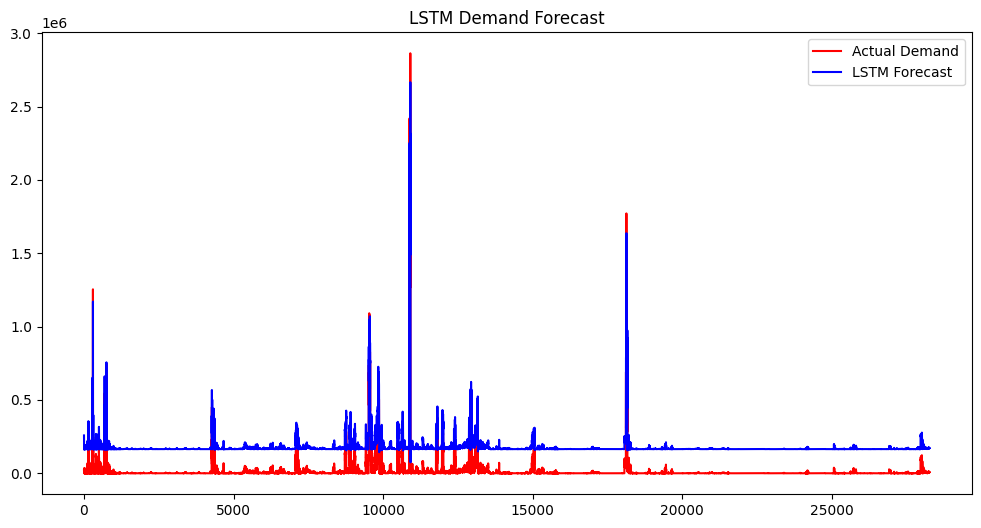

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Actual Demand", color="red")
plt.plot(y_pred_inv, label="LSTM Forecast", color="blue")
plt.legend()
plt.title("LSTM Demand Forecast")
plt.show()


XGBoost model


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Number of past observations to use as features
n_lags = 12

# Create lagged features
for i in range(1, n_lags + 1):
    df[f'lag_{i}'] = df['value'].shift(i)

# Drop NaN values created due to shifting
df = df.dropna()

# Splitting into features (X) and target (y)
X = df.drop(columns=['value'])
y = df['value']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(X_train.shape, X_test.shape)  # Check dimensions


(113070, 15) (28268, 15)


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming df is your original DataFrame

# Number of past observations to use as features
n_lags = 12

# Create lagged features
for i in range(1, n_lags + 1):
    df[f'lag_{i}'] = df['value'].shift(i)

# Drop NaN values created due to shifting
df = df.dropna()

# Splitting into features (X) and target (y)
X = df.drop(columns=['value'])
y = df['value']

# Select only numerical features for XGBoost
numerical_features = X.select_dtypes(include=['number']).columns
X = X[numerical_features]


# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(X_train.shape, X_test.shape)  # Check dimensions


# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

(113060, 13) (28266, 13)


In [24]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 521845.56
RMSE: 3192501.93


In [27]:
# Get the last available values from the dataset, including all features used in training
last_values = df[X_train.columns].iloc[-1].values.reshape(1, -1)  # Assuming all features were used

# Predict next demand
future_forecast = xgb_model.predict(last_values)

print(f"Next month's forecasted demand: {future_forecast[0]:.2f}")

Next month's forecasted demand: 682894.81


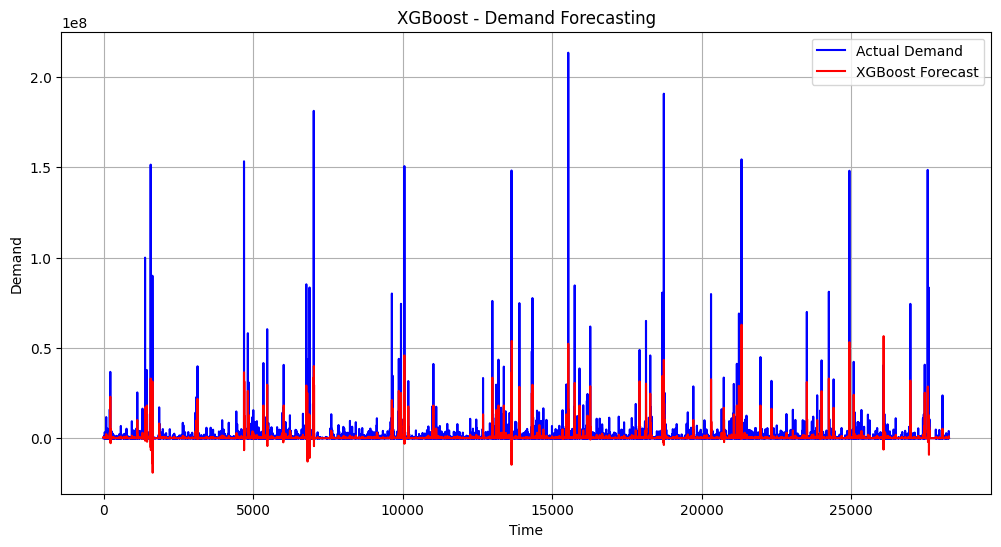

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Demand', color='blue')
plt.plot(y_pred, label='XGBoost Forecast', color='red')
plt.title("XGBoost - Demand Forecasting")
plt.xlabel("Time")
plt.ylabel("Demand")
plt.legend()
plt.grid()
plt.show()
